In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("../data/CardioGoodFitness.csv")

test cell 

In [8]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
df['Age'].value_counts()

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

In [11]:
df.corr(method='pearson', numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [12]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [13]:
#df_partnered = df[df['MaritalStatus']=='Single'] #73 are single
singel_men = df[(df['MaritalStatus']=='Single') & (df['Gender']=='Male')]
singel_men = singel_men['Income'].value_counts()
singel_men

Income
32973    3
45480    3
54576    3
48891    2
88396    2
38658    2
40932    2
31836    2
48556    2
52302    2
51165    2
61006    1
49801    1
52290    1
92131    1
83416    1
89641    1
58516    1
29562    1
54781    1
48658    1
67083    1
60261    1
44343    1
50028    1
43206    1
36384    1
35247    1
90886    1
Name: count, dtype: int64

In [14]:
df_women = df[df['Gender']=='Male'] # 76 people are women
df_women

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
7,TM195,21,Male,13,Single,3,3,32973,85
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [15]:
df['Product'].unique() #There are three different equipment

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [16]:
df['Age'].unique() # max age is 50, min is 18

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [17]:
df['Fitness'].unique() #fitness values goes from 1-5

array([4, 3, 2, 1, 5])

In [18]:
df_TM195 = df[df['Product']=='TM195'] #TM195 is most used
df_TM195['Miles'].max()

188

In [19]:
df_TM798 = df[df['Product']=='TM798'] #About equal for gender usage
df_TM798['Miles'].max()

360

In [20]:
df_TM498 = df[df['Product']=='TM498'] #About equal for gender usage
df_TM498['Miles'].max()

212

In [21]:
female_p = df[(df['Gender'] == 'Male') & (df['MaritalStatus'] == 'Single')].value_counts()
female_p.info()


<class 'pandas.core.series.Series'>
MultiIndex: 43 entries, ('TM195', 18, 'Male', 14, 'Single', 3, 4, 29562, 112) to ('TM798', 45, 'Male', 16, 'Single', 5, 5, 90886, 160)
Series name: count
Non-Null Count  Dtype
--------------  -----
43 non-null     int64
dtypes: int64(1)
memory usage: 1.9+ KB


In [22]:
df_TM798 = df[df['Product']=='TM798'] #More males use this one 
df_TM798['Age'].unique()

array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 38, 40, 42, 45,
       47, 48])

In [23]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

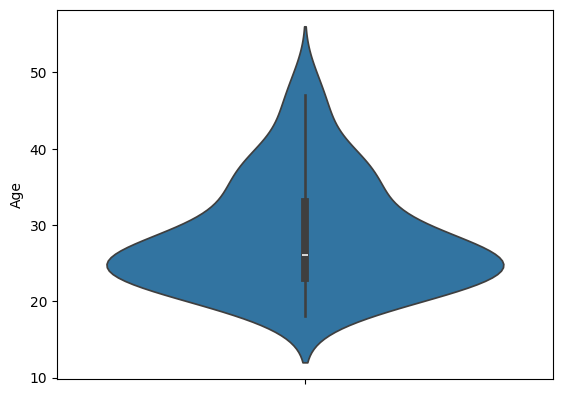

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.violinplot(y=df['Age'])
sns.violinplot(y=df_TM195['Age'])
# Show the plot
plt.show()

In [25]:
print(f"Mode of TM195 is {df_TM195['Age'].mode().values}")
print(f"Mode of TM498 is {df_TM498['Age'].mode().values}")
print(f"Mode of TM798 is {df_TM798['Age'].mode().values}")

Mode of TM195 is [23]
Mode of TM498 is [25]
Mode of TM798 is [25]


In [26]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [27]:
print(f"Median age of TM195 is {df_TM195['Age'].median()}")
print(f"Median age of TM498 is {df_TM498['Age'].median()}")
print(f"Median age of TM798 is {df_TM798['Age'].median()}")

Median age of TM195 is 26.0
Median age of TM498 is 26.0
Median age of TM798 is 27.0


In [28]:
print(f"Mode of TM195 education is {df_TM195['Education'].mode().values}")
print(f"Mode of TM498 education is {df_TM498['Education'].mode().values}")
print(f"Mode of TM798 education is {df_TM798['Education'].mode().values}")

Mode of TM195 education is [16]
Mode of TM498 education is [16]
Mode of TM798 education is [18]


In [29]:
print(f"Mode of usage TM195 is {df_TM195['Usage'].mode().values}")
print(f"Mode of usage TM498 is {df_TM498['Usage'].mode().values}")
print(f"Mode of usage TM798 is {df_TM798['Usage'].mode().values}")

Mode of usage TM195 is [3]
Mode of usage TM498 is [3]
Mode of usage TM798 is [4]


In [30]:
df_TM195_fm = df_TM195['Income'].mode().values
df_TM498_fm = df_TM498['Income'].mode().values
df_TM798_fm = df_TM798['Income'].mode().values

In [31]:
df_TM195_female = (df_TM195['Gender']=='Female').sum()
df_TM195_male = (df_TM195['Gender']=='Male').sum()
df_TM498_female = (df_TM498['Gender']=='Female').sum()
df_TM498_male = (df_TM498['Gender']=='Male').sum()
df_TM798_female = (df_TM798['Gender']=='Female').sum()
df_TM798_male = (df_TM798['Gender']=='Male').sum()

In [32]:
#Size
plt.figure(figsize=(8,6))
bar_with = 0.15

# List of values and corresponding labels
counts_female = [df_TM195_female, df_TM498_female, df_TM798_female]
counts_male = [df_TM195_male, df_TM498_male, df_TM798_male]
labels = ['TM195', 'TM498', 'TM798']

# Position of bars on X-axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]
plt.bar(r1, counts_female, color='#FF4500', width=bar_width, label='Female')
plt.bar(r2, counts_male, color='#1E90FF', width=bar_width, label='Male')

plt.xlabel('Treadmill Models')
plt.ylabel('Number of users')
plt.title('Gender distribution Treadmill Models')

#Make better ticks
plt.xticks([r + bar_width / 2 for r in range(len(labels))], labels)

#Add legend
plt.legend()

#plt.ylim()  # Adjust y-axis limits if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'bar_width' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
df_TM195_fit_f = df_TM195[df_TM195['Gender']=='Female']['Fitness'].value_counts()
df_TM195_fit_m = df_TM195[df_TM195['Gender']=='Male']['Fitness'].value_counts()
df_TM498_fit_f = df_TM498[df_TM498['Gender']=='Female']['Fitness'].value_counts()
df_TM498_fit_m = df_TM498[df_TM498['Gender']=='Male']['Fitness'].value_counts()
df_TM798_fit_f = df_TM798[df_TM798['Gender']=='Female']['Fitness'].value_counts()
df_TM798_fit_m = df_TM798[df_TM798['Gender']=='Male']['Fitness'].value_counts()
df_TM195_fit_f

Fitness
3    26
2    10
4     3
5     1
Name: count, dtype: int64

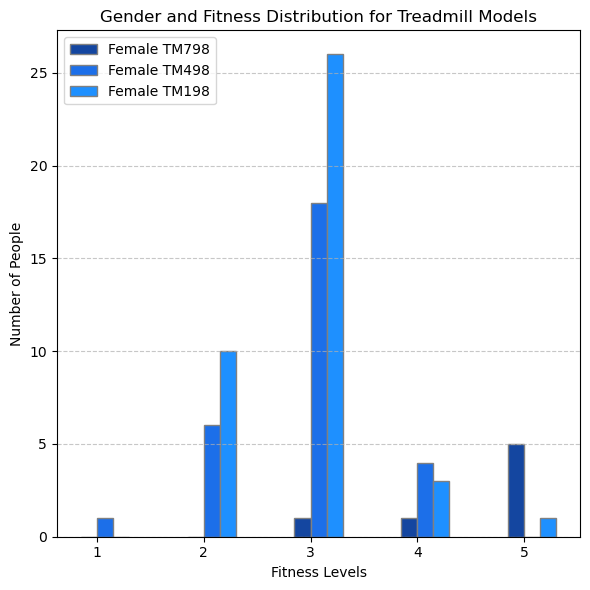

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for TM798 and TM498 fitness level distribution for males
fit_level = [1,2,3,4,5]
M798_fit_level_Count = [0,0,3,6,24]
M498_fit_level_Count = [0,0,4,6,21]
M195_fit_level_Count = [1,4,28,6,1]
F798_fit_level_Count = [0,0,1,1,5]
F498_fit_level_Count = [1,6,18,4,0]
F195_fit_level_Count = [0,10,26,3,1]

# Size of the plot
plt.figure(figsize=(6, 6))

# Width of the bars
bar_width = 0.15

# Positions for the bars
r1 = np.arange(len(fit_level))  # Generate evenly spaced values for the x-axis
r2 = [x + bar_width for x in r1]      # Offset the x values for the second set of bars
r3 = [x + 2*bar_width for x in r1]
r4 = [x + 3*bar_width for x in r1]
r5 = [x + 4*bar_width for x in r1]
r6 = [x + 5*bar_width for x in r1]
# Plotting the bars side by side
#plt.bar(r1, M798_fit_level_Count, color='#C13700', width=bar_width, edgecolor='grey', label='Male TM798')
#plt.bar(r2, M498_fit_level_Count, color='#E03E00', width=bar_width, edgecolor='grey', label='Male TM498')
#plt.bar(r3, M195_fit_level_Count, color='#FF4500', width=bar_width, edgecolor='grey', label='Male TM198')

plt.bar(r1, F798_fit_level_Count, color='#1446A0', width=bar_width, edgecolor='grey', label='Female TM798')
plt.bar(r2, F498_fit_level_Count, color='#1C6FE9', width=bar_width, edgecolor='grey', label='Female TM498')
plt.bar(r3, F195_fit_level_Count, color='#1E90FF', width=bar_width, edgecolor='grey', label='Female TM198')

# Adding labels and title
plt.xlabel('Fitness Levels')
plt.ylabel('Number of People')
plt.title('Gender and Fitness Distribution for Treadmill Models')

# Adjusting x-axis ticks and labels
plt.xticks(r1 + bar_width / 2, fit_level)

# Adding legend
plt.legend(loc='upper left')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
